In [1]:
!pip install Unidecode
!pip install fuzzysearch

!pip install elementpath
!pip install lxml 
!pip install graphviz
!pip install pydotplus

In [1]:
!ls ../../edspdf-train/data/publaynet/

dev.json xmls


# Sorting lines based on the xml files

In [2]:
from sort_xml import *
base_dir = '../../edspdf-train/data/publaynet/'

%load_ext autoreload
%autoreload 2

import sys
sys.executable

'/Users/souleymbaye/opt/anaconda3/envs/eds_env/bin/python'

### Load pdf and xml example 

In [4]:
!ls ../../edspdf-train/data/publaynet/xmls | head -n +25

PMC1087887
PMC1087888
PMC1241820
PMC1247186
PMC1247188
PMC1247189
PMC1247474
PMC1247478
PMC1247480
PMC1247485
PMC1247515
PMC1247517
PMC1247523
PMC1247562
PMC1247569
PMC1247570
PMC1247573
PMC1247606
PMC1247607
PMC1247608
PMC1247616
PMC1247620
PMC1247625
PMC1247658
PMC1247661


In [3]:
!ls ../../edspdf-train/data/publaynet/xmls/PMC1808441/

1748-7161-2-3-1.gif  1748-7161-2-3-2.jpg  1748-7161-2-3-S1.pdf
1748-7161-2-3-1.jpg  1748-7161-2-3-3.gif  1748-7161-2-3.nxml
1748-7161-2-3-2.gif  1748-7161-2-3-3.jpg  1748-7161-2-3.pdf


In [ ]:
PMC1247562 # exellent
PMC1247569 # exell b-37 --> (now ok)
PMC1247570 # title twice b-16, b-23
PMC1247573 # front, body et tables perfect
PMC1247606 # between b-7 and b-8, two missing nodes in the xml
PMC1247607 # body et tables perfect
PMC1247608
PMC1247616
PMC1280340 # body et tables perfect
PMC1247620 # 6min trop long
PMC1247625 # perfect (0 table)
PMC1247658 # 3min


PMC1247573 # A voir pour table

In [20]:
file_dir = base_dir + 'xmls/PMC1808441'
pdf_path, xml_path = get_paths(file_dir = file_dir)
print(f'xml path: {xml_path}\npdf path: {pdf_path}')


xml path: ../../edspdf-train/data/publaynet/xmls/PMC1808441/1748-7161-2-3.nxml
pdf path: ../../edspdf-train/data/publaynet/xmls/PMC1808441/1748-7161-2-3.pdf


## Model extractor

In [5]:
from edspdf import Pipeline
from edspdf.structures import Box, PDFDoc
from edspdf.visualization.annotations import show_annotations

# model
model = Pipeline()
model.add_pipe("pdfminer-extractor", config=dict(extract_style="true"), name="extractor")

# Read PDF
pdf = pdf_path.read_bytes()
doc: PDFDoc = model.get_pipe("extractor")(pdf)

dict_page_text_boxes = {}
for tb in doc.content_boxes:
    if tb.page_num not in dict_page_text_boxes:
        dict_page_text_boxes[tb.page_num] = []
    dict_page_text_boxes[tb.page_num].append(tb)
print(f'Nb pages {len(dict_page_text_boxes)}')
# pages = [page for page in show_annotations(doc.content, doc.content_lines)]
# for page in show_annotations(doc.content, doc.content_boxes):
#     display(page)

Nb pages 8


#### Display XML

In [6]:
# Read XML
xml = open(xml_path, 'rb')
tree = etree.parse(xml)
# root = tree.getroot()

printXML(tree)

<!DOCTYPE article PUBLIC "-//NLM//DTD Journal Archiving and Interchange DTD v2.3 20070202//EN" "archivearticle.dtd">
<article xmlns:xlink="http://www.w3.org/1999/xlink" article-type="research-article">
  <?properties open_access?>
  <front>
    <journal-meta>
      <journal-id journal-id-type="nlm-ta">Scoliosis</journal-id>
      <journal-title>Scoliosis</journal-title>
      <issn pub-type="epub">1748-7161</issn>
      <publisher>
        <publisher-name>BioMed Central</publisher-name>
        <publisher-loc>London</publisher-loc>
      </publisher>
    </journal-meta>
    <article-meta>
      <article-id pub-id-type="pmid">17316422</article-id>
      <article-id pub-id-type="pmc">1808441</article-id>
      <article-id pub-id-type="publisher-id">1748-7161-2-3</article-id>
      <article-id pub-id-type="doi">10.1186/1748-7161-2-3</article-id>
      <article-categories>
        <subj-group subj-group-type="heading">
          <subject>Research</subject>
        </subj-group>
      </art

#### Font, Body and tables text nodes

##### Front nodes matching

In [7]:
xml_front_nodes = get_front_nodes(tree)

print(f'\n\nNb nodes {len(xml_front_nodes)}')
for id,xml_node in enumerate(xml_front_nodes):
    printXML(xml_node)

front_nodes = []
for id,xml_node in enumerate(xml_front_nodes):
    node = Node(xml_node, id, color='yellow', bg_color='black', r0='f', entropie_threshold=0.1)
    front_nodes.append(node)
    
front_nodes = tqdm(front_nodes, mininterval=1)



Nb nodes 8
<article-title xmlns:xlink="http://www.w3.org/1999/xlink">Growth rates and the prevalence and progression of scoliosis in short-statured children on Australian growth hormone treatment programmes</article-title>

<contrib-groups>
  <new-name>
    <given-names>Gregory A</given-names>
    <surname>Day</surname>
  </new-name>
  <vigule>,</vigule>
  <xref ref-type="aff" rid="I1">1</xref>
  <vigule>,</vigule>
  <xref ref-type="aff" rid="I3">3</xref>
  <new-name>
    <given-names>Ian Bruce</given-names>
    <surname>McPhee</surname>
  </new-name>
  <vigule>,</vigule>
  <xref ref-type="aff" rid="I1">1</xref>
  <new-name>
    <given-names>Jenny</given-names>
    <surname>Batch</surname>
  </new-name>
  <vigule>,</vigule>
  <xref ref-type="aff" rid="I2">2</xref>
  <new-name>
    <given-names>Francis H</given-names>
    <surname>Tomlinson</surname>
  </new-name>
  <vigule>,</vigule>
  <xref ref-type="aff" rid="I1">1</xref>
</contrib-groups>

<affs>
  <aff id="I1"><label>1</label>Dep

  0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
for tb in doc.content_boxes:
    tb.rank = None
    tb.inode = None

In [9]:
for node in front_nodes:
    node.reset()

get_matches(front_nodes, dict_page_text_boxes, v=False)

100%|██████████| 8/8 [00:05<00:00,  1.39it/s]


In [10]:
n_tt = len(front_nodes)
n_mt = len([0 for node in front_nodes if node.full])
print(f'Front\n  Nb nodes total {n_tt}\n  Nb nodes matched {n_mt}\n  Nb nodes not matched {n_tt-n_mt}')
for node in front_nodes:
    if not node.full:
        print(f'    {node.id}  `{node.text}`')

Front
  Nb nodes total 8
  Nb nodes matched 6
  Nb nodes not matched 2
    1  `Gregory A Day , 1 , 3 Ian Bruce McPhee , 1 Jenny Batch , 2 Francis H Tomlinson , 1`
    3  `This is an Open Access article distributed under the terms of the Creative Commons Attribution License ( ), which permits unrestricted use, distribution, and reproduction in any medium, provided the original work is properly cited.`


In [10]:
# id = 0
# for node in front_nodes:
#     if node.id == id:
#         break

# node.print_node()

##### Body nodes matching

In [11]:
# executer une seule fois sionon erreur
# moins de noeuds retournes

qbody='//body//title | //body//p'
r = elementpath.select(tree, qbody)
r2 = []

jump = False
for i,node in enumerate(r):
    if jump:
        jump = False
        continue
    if node.tag == 'title' and r[1+i].tag == 'p':
        sec = etree.Element('sec')
        sec.append(node)
        sec.append(r[1+i])
        r2.append(sec)
        jump = True
    else:
        r2.append(node)

xml_body_nodes = r2

body_nodes = []
for id, xml_node in enumerate(xml_body_nodes):
    node = Node(xml_node, id, color='black', bg_color='cyan', r0='b')
    body_nodes.append(node)
body_nodes = tqdm(body_nodes, mininterval=1)

  0%|          | 0/52 [00:00<?, ?it/s]

In [12]:
for node in body_nodes:
    node.reset()

get_matches(body_nodes, dict_page_text_boxes, v=False)

100%|██████████| 52/52 [00:03<00:00, 17.17it/s]

In [13]:
n_tt = len(body_nodes)
n_mt = len([0 for node in body_nodes if node.full])
print(f'Body\n  Nb nodes total {n_tt}\n  Nb nodes matched {n_mt}\n  Nb nodes not matched {n_tt-n_mt}')
for node in body_nodes:
    if not node.full:
        print(f'    {node.id}  `{node.text}`')

Body
  Nb nodes total 52
  Nb nodes matched 49
  Nb nodes not matched 3
    4  `Syndromes/conditions known to be associated with scoliosis`
    8  `Turner syndrome scoliosis (non-congenital)`
    49  `Supplementary Material`


Introduction

Contex
Datset
Model


In [14]:
inode_copy = []
for tb in doc.content_boxes:
    inode_copy.append(tb.inode)

In [15]:
id = 4
for node in body_nodes:
    if node.id == id: break
printXML(node.xml_node)
node.print_node()

<p xmlns:xlink="http://www.w3.org/1999/xlink">Syndromes/conditions known to be associated with scoliosis</p>

Nb blocs 2
Node (4 not complete) text: `Syndromes/conditions known to be associated with scoliosis`
bloc 0
  Id 0 nb tbs 1
  Text: `Scoliosis`
  merged ids: `{'0'}`
     0 p-0 `Scoliosis` 		-> [Match(start=43, end=52, dist=1, matched='scoliosis')] TextBox(x0=0.0903921568627451, x1=0.277678431372549, y0=0.04340909090909095, y1=0.07371212121212123, label=None, page_num=0, text='Scoliosis', props=[TextProperties(italic=False, bold=False, begin=0, end=9, fontname='GCAJKJ+Frutiger-UltraBlack')])
bloc 2
  Id 2 nb tbs 1
  Text: `Scoliosis`
  merged ids: `{'2'}`
     0 p-2 `Scoliosis` 		-> [Match(start=43, end=52, dist=1, matched='scoliosis')] TextBox(x0=0.0965686274509804, x1=0.14991400980392158, y0=0.7174628787878787, y1=0.7278416666666667, label=None, page_num=2, text='Scoliosis', props=[TextProperties(italic=False, bold=True, begin=0, end=9, fontname='GCAMIA+GillSans-Bold')])


In [26]:
# tbs = []
# for tb in doc.content_boxes:
#     if tb.inode is None and tb.page_num == 2:
#         print(f'`{tb.text}` {tb}')
#         tbs.append(tb)
# tb = tbs[1]

print(f'\n`{tb.text}` {tb}')


`Iv = n • d–` TextBox(x0=0.7379431176470588, x1=0.789837908496732, y0=0.7714659090909091, y1=0.7872044191919192, label=None, page_num=2, text='Iv = n • d–', props=[TextProperties(italic=False, bold=False, begin=0, end=4, fontname='AJFDFB+AGaramond-Regular'), TextProperties(italic=True, bold=False, begin=5, end=6, fontname='AJPBMF+AGaramond-Italic'), TextProperties(italic=False, bold=False, begin=7, end=11, fontname='AJFDFB+AGaramond-Regular')])


In [29]:

delete_white_spaces(unidecode(" ".join(node.xml_node.itertext()))), \
delete_white_spaces(unidecode(tb.text))

('Iv=n*[1]', 'Iv=n*d-')

##### Tables nodes matching

In [16]:
# one execution

qtables='//table-wrap'
tables_nodes=elementpath.select(tree, qtables)


qtable='//label | //caption | //tr | //table-wrap-foot'
xml_table_nodes = [
    [
        node for node in one_tns if "".join(node.itertext()) != ""
    ]
    for one_tns in [elementpath.select(table_tree, qtable) for table_tree in tables_nodes]
]

# Merging label and caption
for itable in range(len(xml_table_nodes)):
    label = None
    caption = None
    lc = None
    for ind,node in enumerate(xml_table_nodes[itable]):
        if node.tag == 'label':
            label = (ind,node)
        if node.tag == 'caption':
            caption = (ind,node)
        if label is not None and caption is not None:
            lc = etree.Element('label_caption')
            lc.append(deepcopy(label[1]))
            lc.append(deepcopy(caption[1]))
            xml_table_nodes[itable][label[0]] = lc
            xml_table_nodes[itable] = xml_table_nodes[itable][:caption[0]] + xml_table_nodes[itable][1+caption[0]:]
            break

# delete other label tags
table_nodes_ = []
for table in xml_table_nodes:
    tk_nodes = []
    for node in table:
        if node.tag != 'label':
            tk_nodes.append(node)
    table_nodes_.append(tk_nodes)
    
xml_table_nodes = table_nodes_

table_nodes = []
for itable,xml_t in enumerate(xml_table_nodes):
    t_nodes = []
    for id,xml_node in enumerate(xml_t):
        node = Node(xml_node, id, color='red', bg_color='white', r0=f't{itable}-')
        t_nodes.append(node)
    t_nodes = tqdm(t_nodes, mininterval=1)
    table_nodes.append(t_nodes)

  0%|          | 0/21 [00:00<?, ?it/s]




In [17]:
# itable = 0
# print(f'Nb nodes of table {itable}: {len(xml_table_nodes[itable])}\n')
# for inode,node in enumerate(xml_table_nodes[itable]):
#     print(f'{node.tag} {inode}\n  `{" | ".join(node.itertext())}`\n')
#     # printXML(node)
#     print('------------------')

In [18]:
# backup tb.inode
for tb,inode in zip(doc.content_boxes, inode_copy):
    tb.inode = inode
    if inode is None:
        tb.rank = None

In [17]:

# for ic,tb in zip(inode_copy,doc.content_boxes):
#     tb.inode = ic
for t_nodes in table_nodes:
    for node in t_nodes:
        node.reset()
    
    get_matches(t_nodes, dict_page_text_boxes, v=False)

# itable = 0
# _tdb = get_matches(table_nodes[itable], dict_page_text_boxes, color='red', bg_color='white',v=False, r0=f't{itable}-')

100%|██████████| 8/8 [00:09<00:00,  1.15s/it]

100%|██████████| 15/15 [00:09<00:00,  1.62it/s]


100%|██████████| 13/13 [00:09<00:00,  1.38it/s]


In [18]:
print(f'Nb tables {len(table_nodes)}')
for itable in range(len(table_nodes)):
    # itable = 0
    
    tk_nodes = table_nodes[itable]
    # tk_nodes_blocs, tk_dict_blocs = _tdb    #   table_dict_blocks[itable]

    n_tt = len(tk_nodes)
    n_mt = len([0 for node in tk_nodes if node.full])
    print(f'Table {itable}\n  Nb nodes total {n_tt}\n  Nb nodes matched {n_mt}\n  Nb nodes not matched {n_tt-n_mt}')
    for node in tk_nodes:
        if not node.full:
            print(f'    {node.id}  `{node.text}`')
    
    # break

Nb tables 4
Table 0
  Nb nodes total 21
  Nb nodes matched 21
  Nb nodes not matched 0
Table 1
  Nb nodes total 8
  Nb nodes matched 7
  Nb nodes not matched 1
    0  `Table 2 Conditions other than idiopathic short stature, not usually associated with scoliosis`
Table 2
  Nb nodes total 15
  Nb nodes matched 15
  Nb nodes not matched 0
Table 3
  Nb nodes total 13
  Nb nodes matched 11
  Nb nodes not matched 2
    0  `Table 4 Statistical analysis for the cohort of 185. Predictors of Scoliosis: Logistic Regression - Univariate Models Results`
    12  `B = Multiple regression co-efficient S.E = Standard error  Wald  (Wald Abraham. Selected papers in statistics and probability. Stanford University Press. New York, Toronto, London. 1955.) Sig.= Significance Exp (B) = Risk ratio Each variable was used in turn to predict the occurrence of scoliosis in a logistic regression model. The size of the first and second doses of HGH (MG per KG1 and 2) and having Turner syndrome were predictive of hav

In [135]:
# inode never matched fails because therefore inode not in _dict_blocs
itable = 5
id = 2
tk_nodes = table_nodes[itable]

# tk_nodes_blocs, tk_dict_blocs = _tdb    #  table_dict_blocks[itable]# 
for node in tk_nodes:
    if node.id == id: break

node.print_node()

Nb blocs 12
Node (2 not complete) text: `Question No. % (95% CI) No. % (95% CI) No. % (95% CI)`
bloc 77
  Id 77 nb tbs 3
  Text: `Question - No. - % (95% CI)`
  merged ids: `{'9', '8', '7'}`
     0 p-3 `Question` 		-> [Match(start=0, end=8, dist=0, matched='Question')] TextBox(x0=0.08006535947712418, x1=0.12216078431372548, y0=0.6111156565656566, y1=0.6212166666666668, label=None, page_num=3, text='Question', props=[TextProperties(italic=False, bold=False, begin=0, end=8, fontname='FLHAKL+Univers-CondensedLight')])
     1 p-3 `No.` 		-> [Match(start=8, end=11, dist=0, matched='No.')] TextBox(x0=0.27433986928104576, x1=0.2910300653594772, y0=0.6111156565656566, y1=0.6212166666666668, label=None, page_num=3, text='No.', props=[TextProperties(italic=False, bold=False, begin=0, end=3, fontname='FLHAKL+Univers-CondensedLight')])
     2 p-3 `% (95% CI)` 		-> [Match(start=11, end=19, dist=0, matched='%(95%CI)')] TextBox(x0=0.32073856209150325, x1=0.37372026143790854, y0=0.6111156565656566, y1

In [90]:
for bl in node.lblocs:
# print(f'id ({bl.id}) meged_ids {bl.merged_ids} text `{bl.text}`')
    print()
    bl.print_bloc()


Id 146 nb tbs 2
Text: `1 - ,`
merged ids: `{'4', '1', '7', '6'}`
   0 p-1 `1` 		-> [Match(start=1, end=2, dist=0, matched='1')] TextBox(x0=0.15787467320261434, x1=0.16277663398692807, y0=0.2806550505050507, y1=0.28823080808080825, label=None, page_num=1, text='1', props=[TextProperties(italic=False, bold=False, begin=0, end=1, fontname='BCCMOH+AGaramond-Regular')])
   1 p-1 `,` 		-> [Match(start=2, end=3, dist=0, matched=',')] TextBox(x0=0.16338839869281047, x1=0.16686062091503268, y0=0.27507575757575764, y1=0.28580808080808084, label=None, page_num=1, text=',', props=[TextProperties(italic=False, bold=False, begin=0, end=1, fontname='BCCMOH+AGaramond-Regular')])

Id 146-0 nb tbs 2
Text: `1 - ,`
merged ids: `{'9', '4', '1', '6'}`
   0 p-1 `1` 		-> [Match(start=1, end=2, dist=0, matched='1')] TextBox(x0=0.15787467320261434, x1=0.16277663398692807, y0=0.2806550505050507, y1=0.28823080808080825, label=None, page_num=1, text='1', props=[TextProperties(italic=False, bold=False, begin=0, en

#### Ranked text boxes

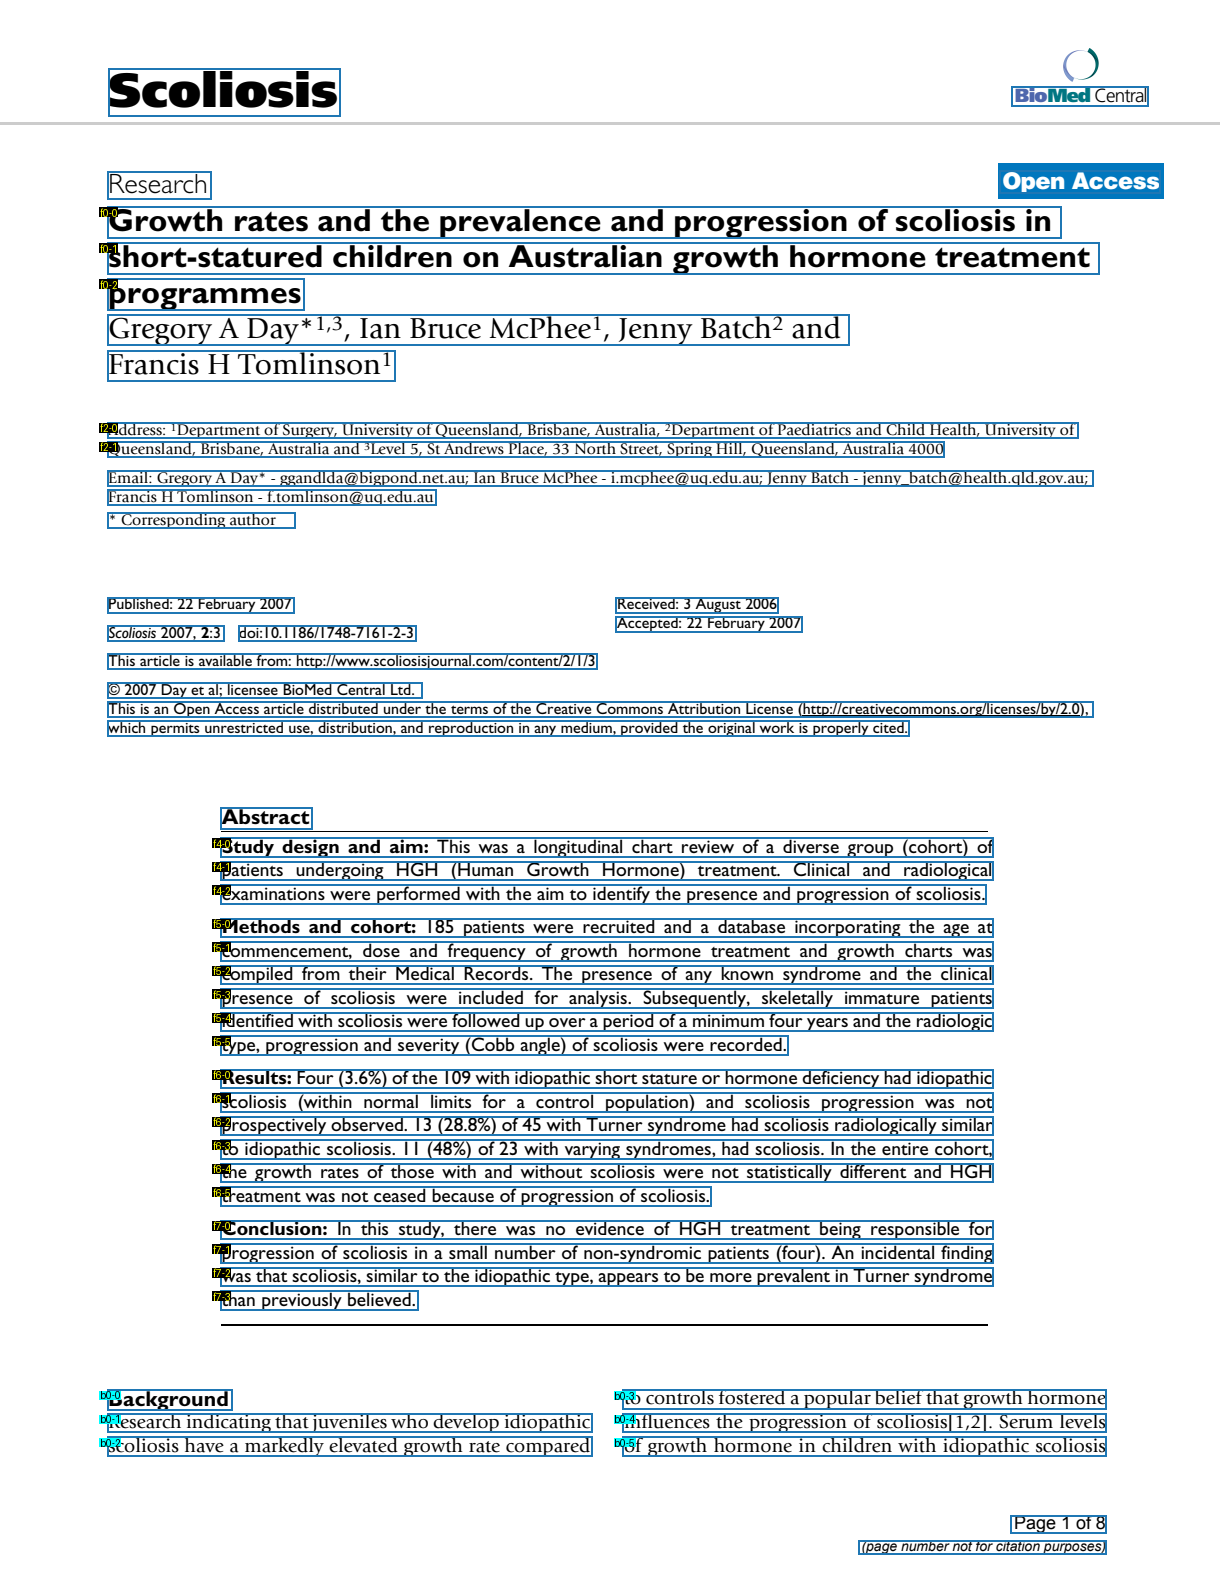

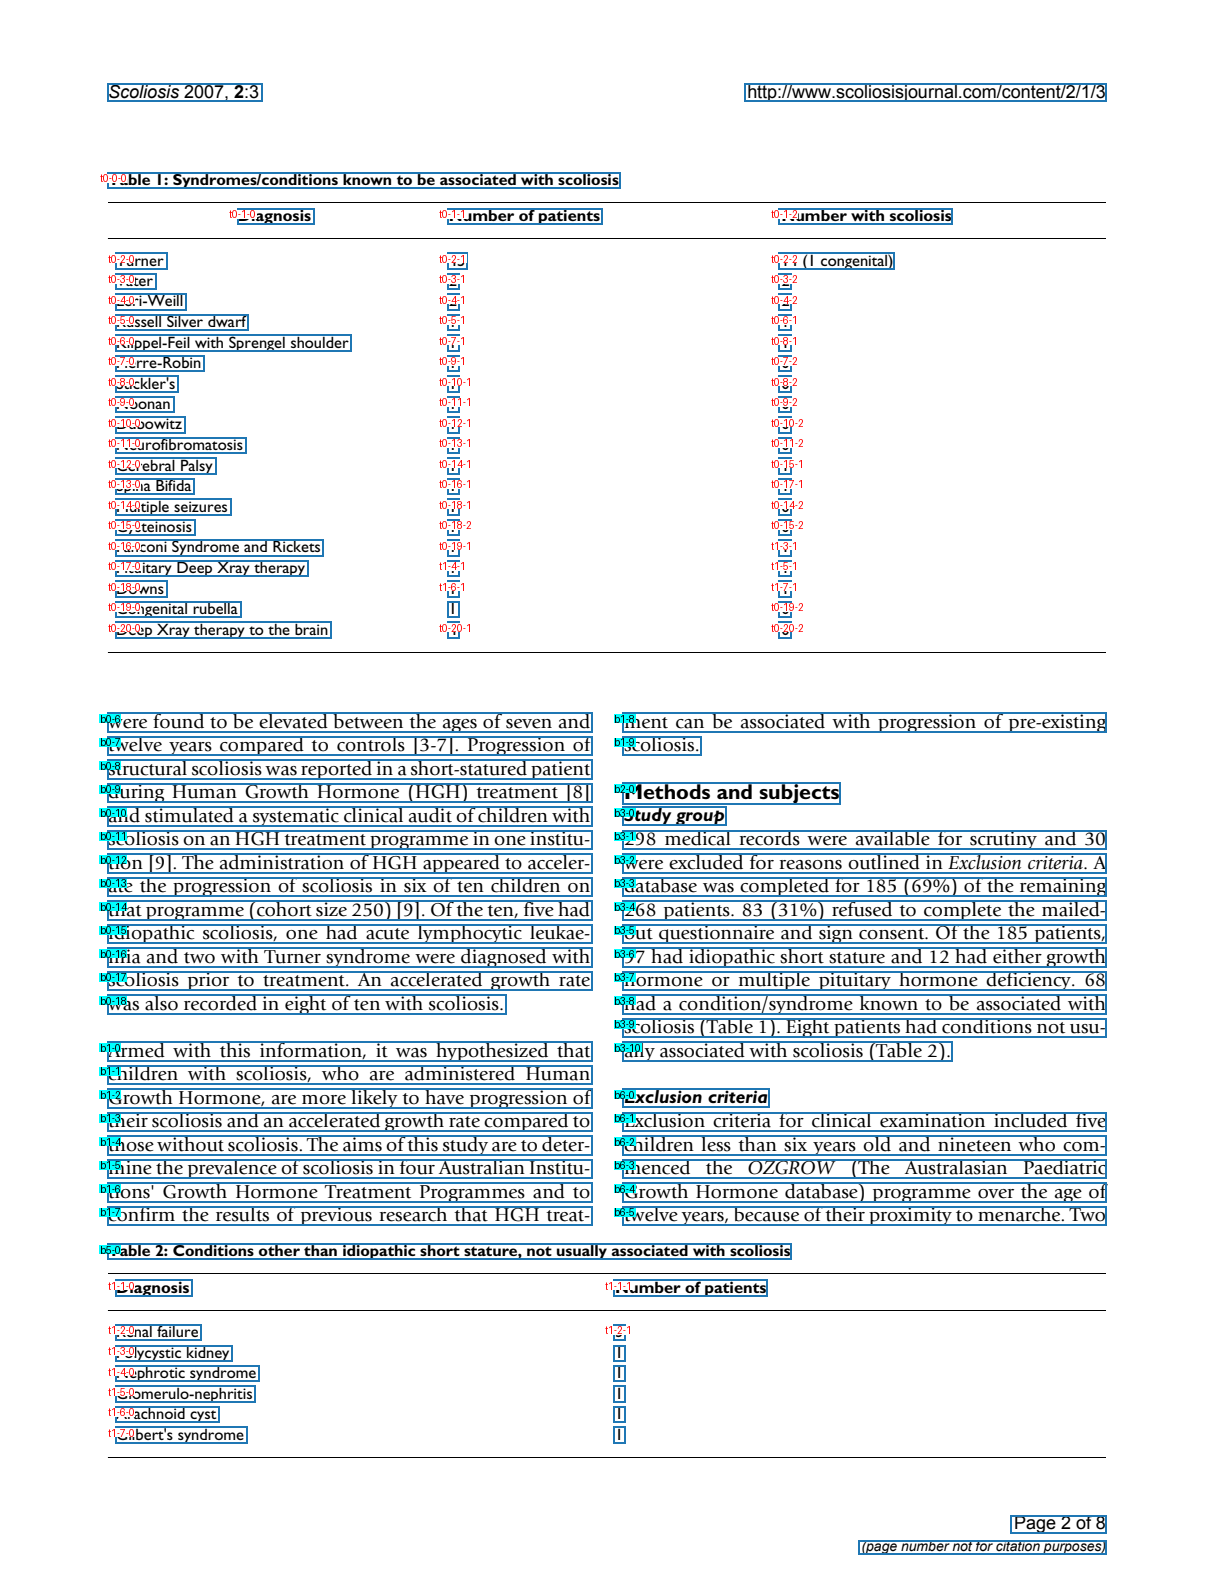

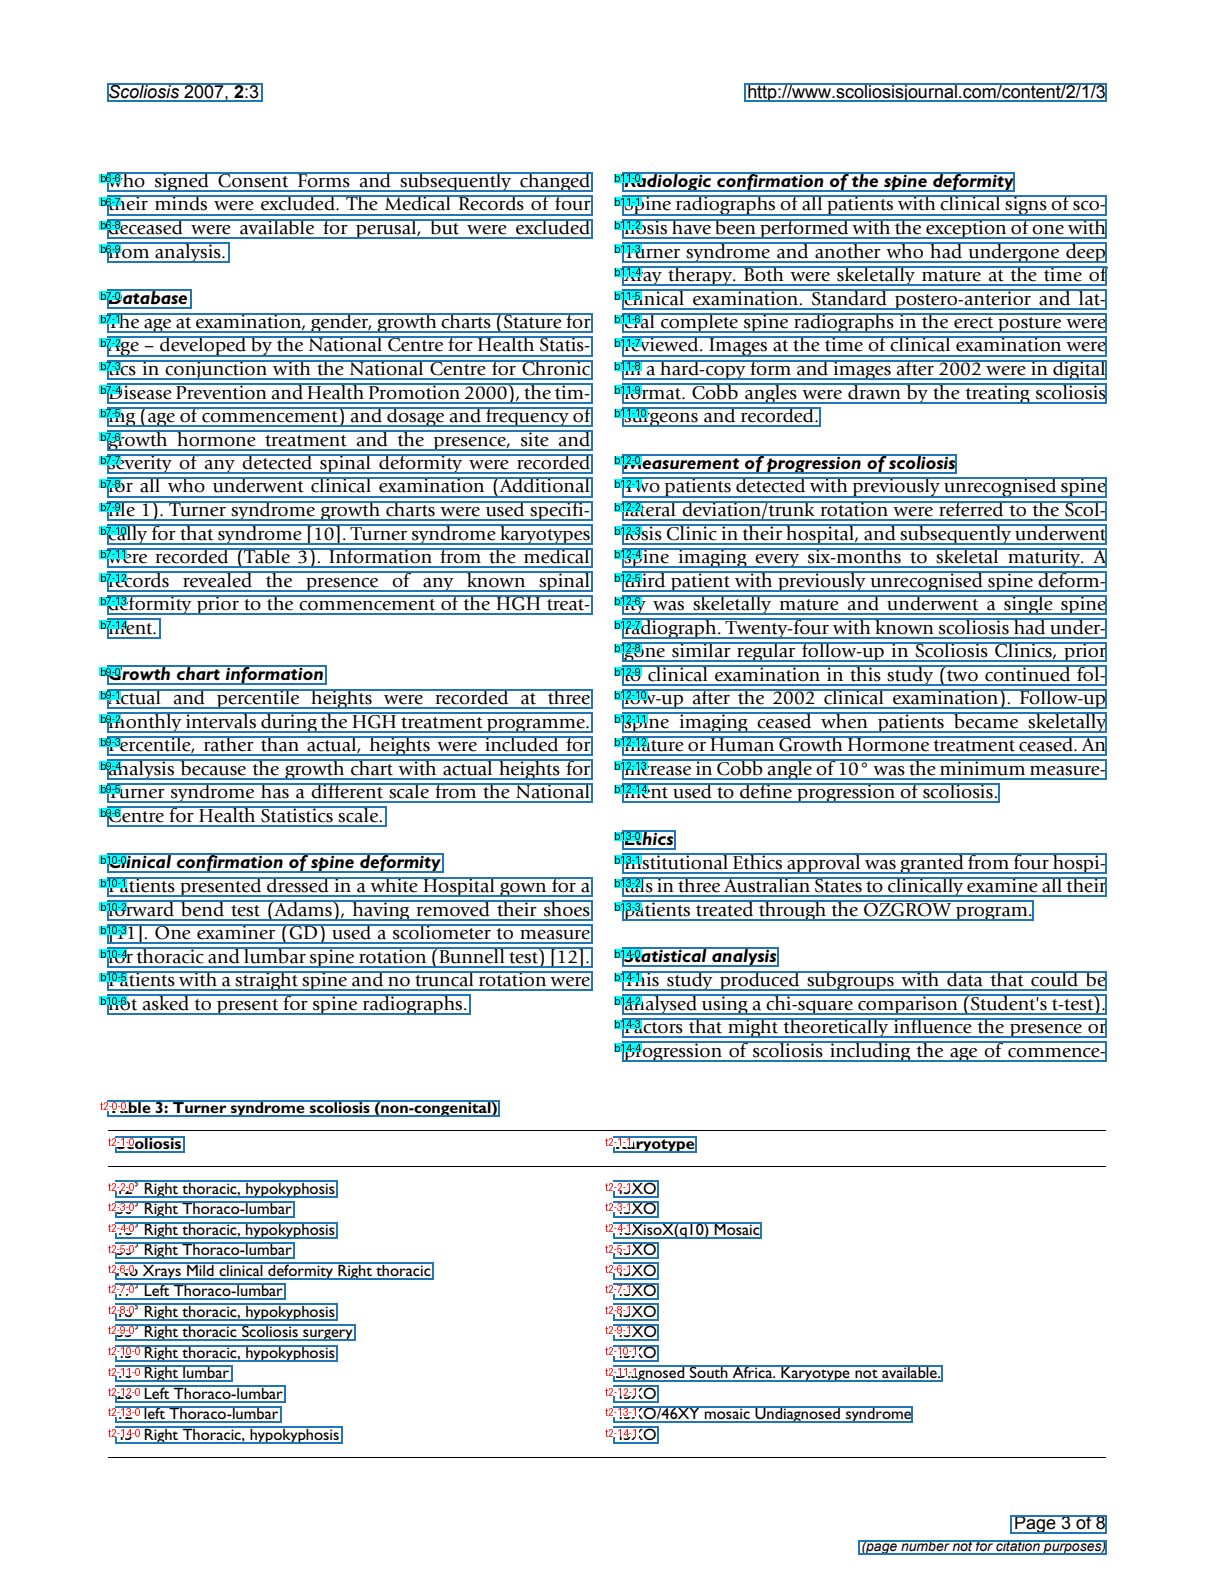

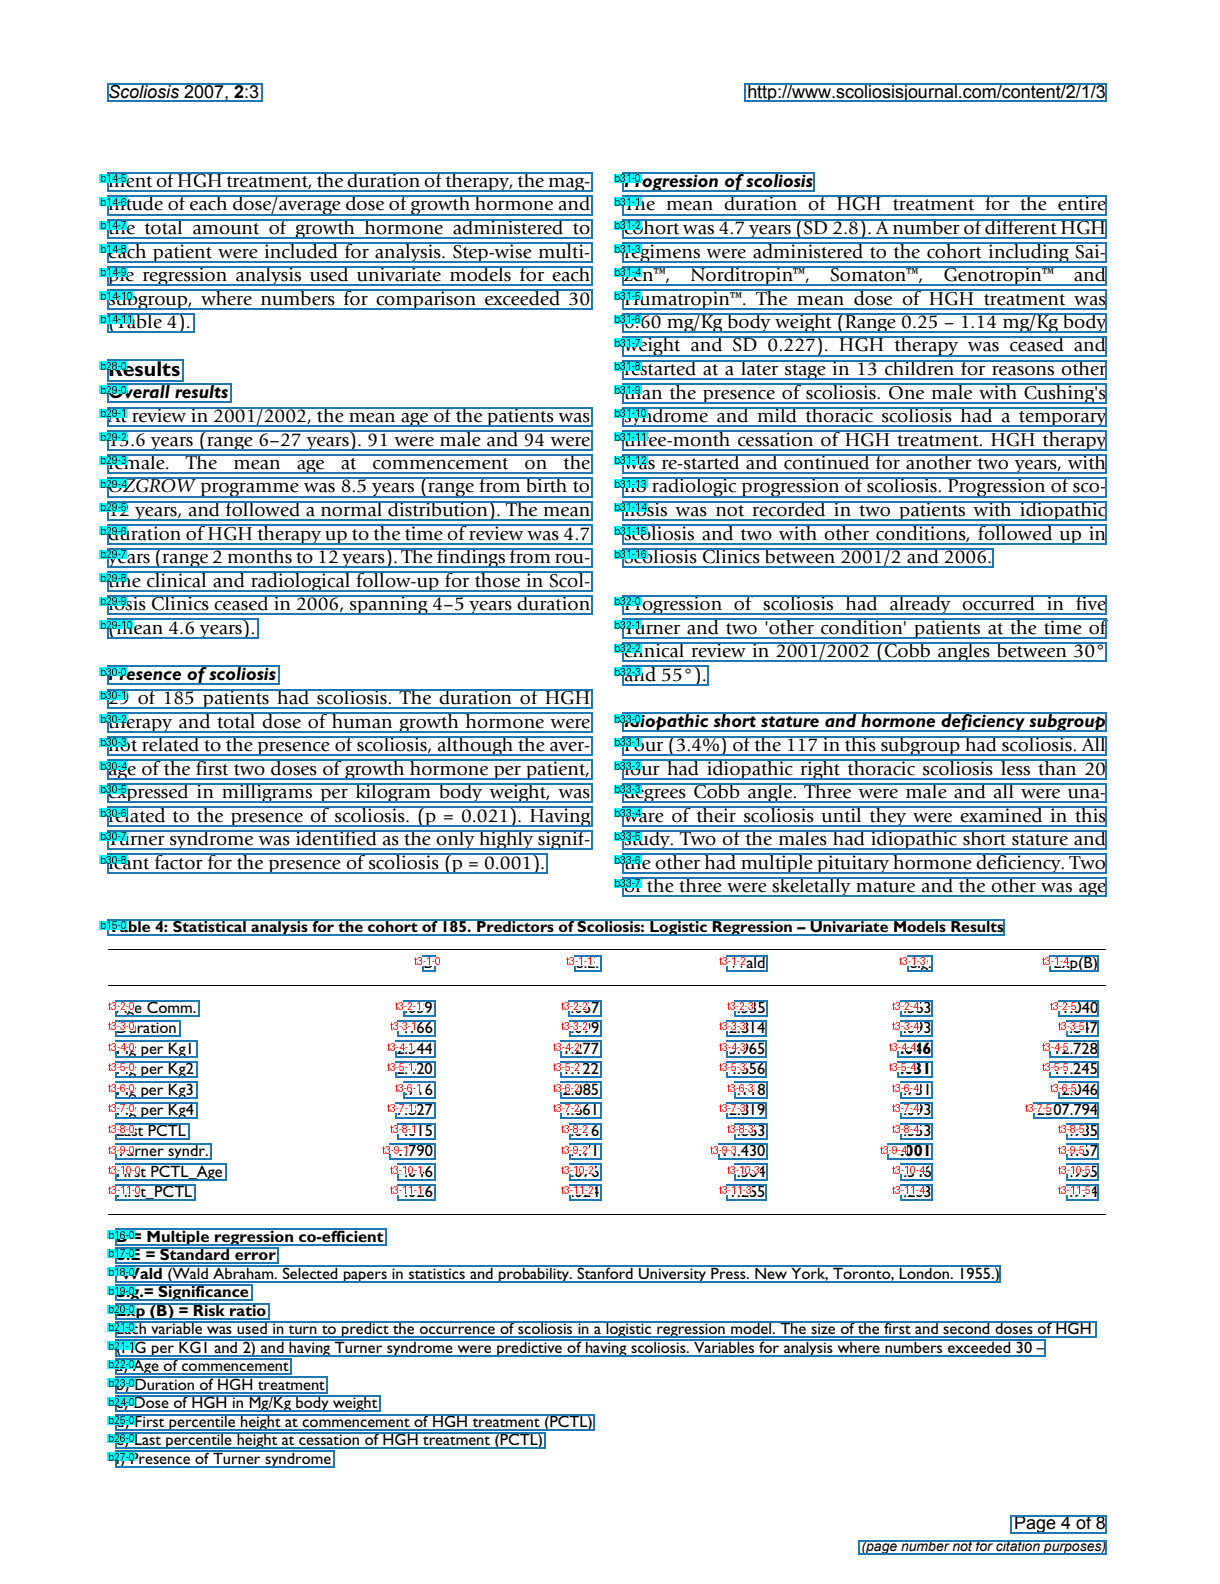

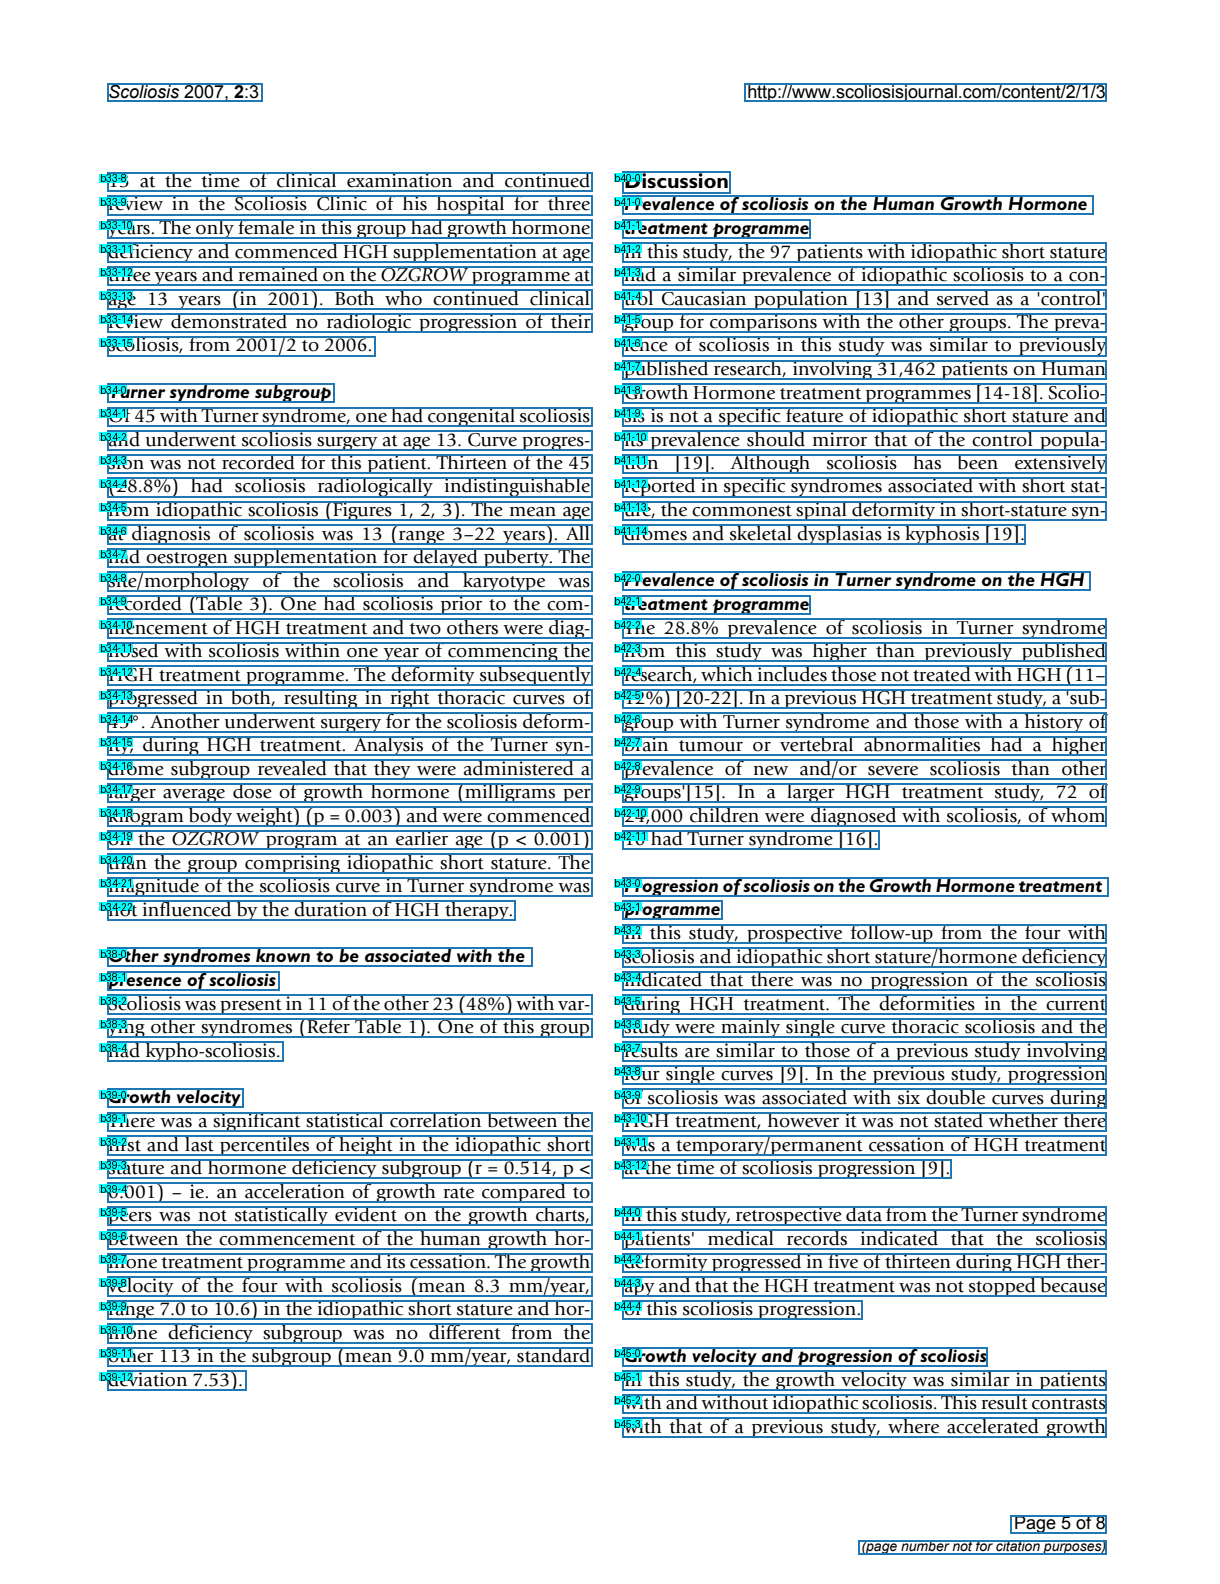

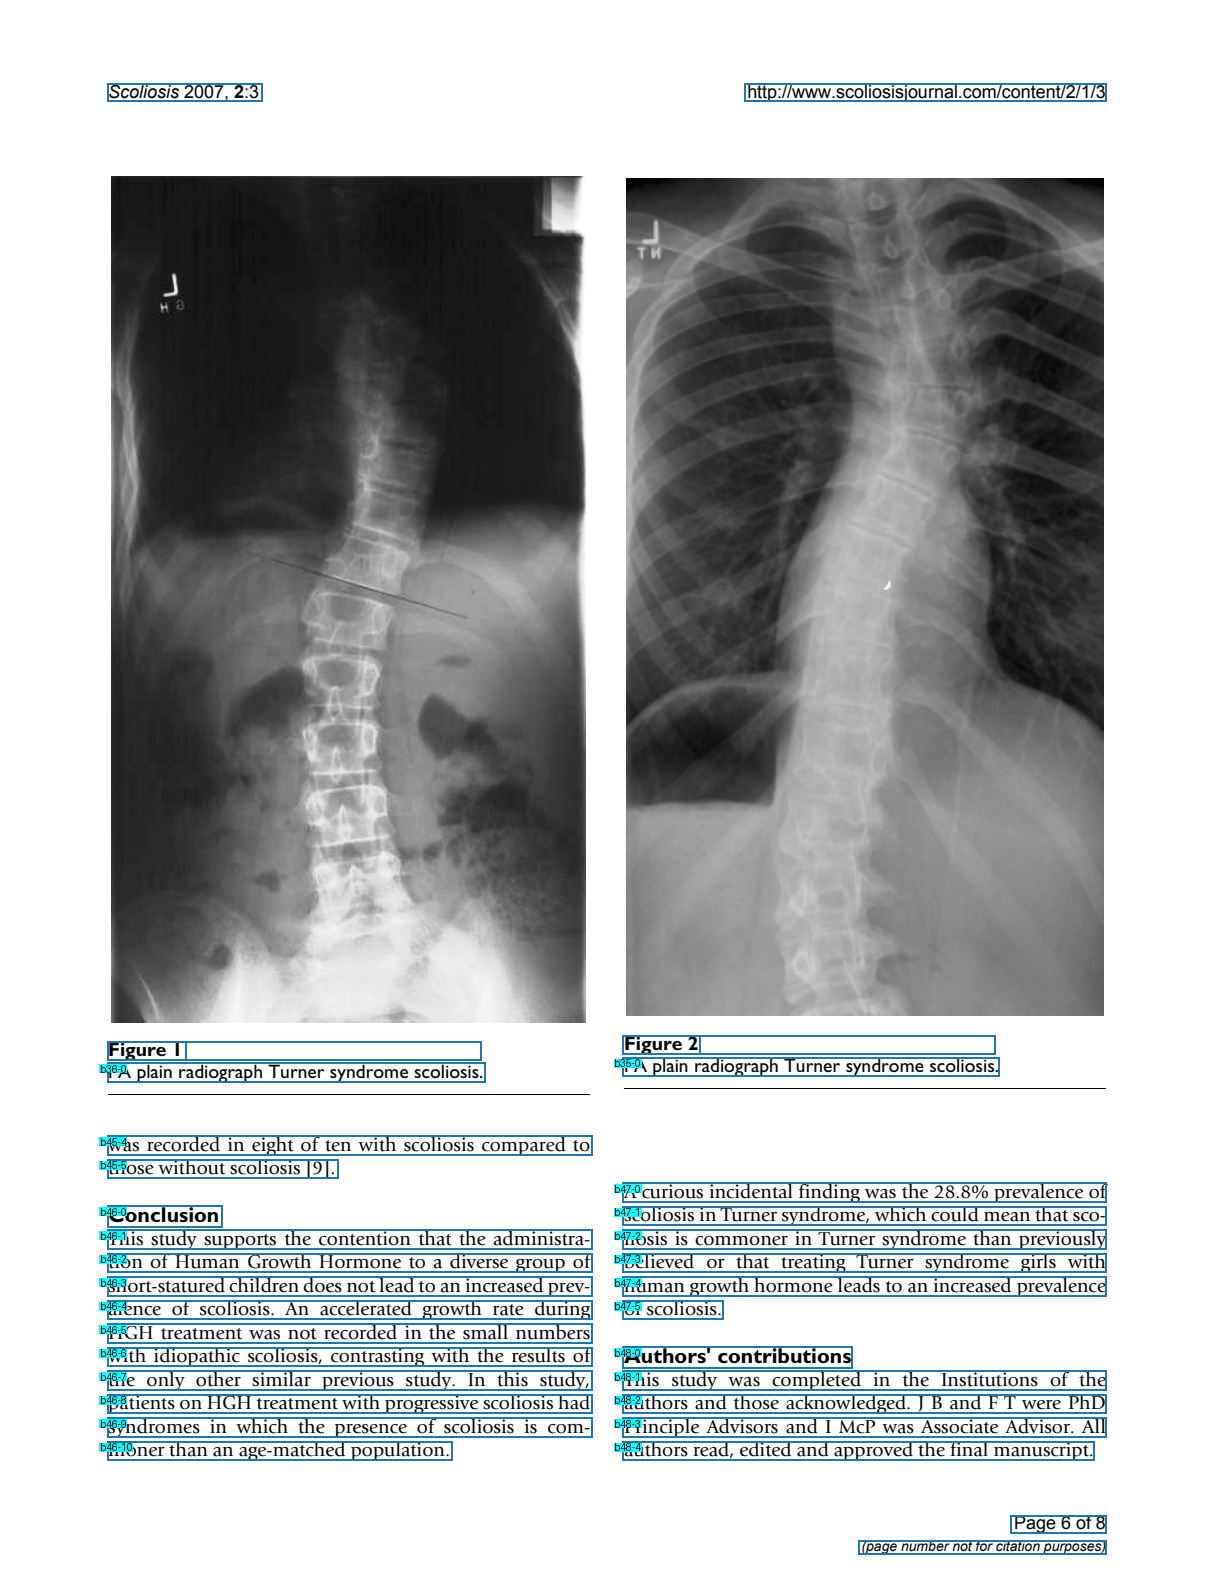

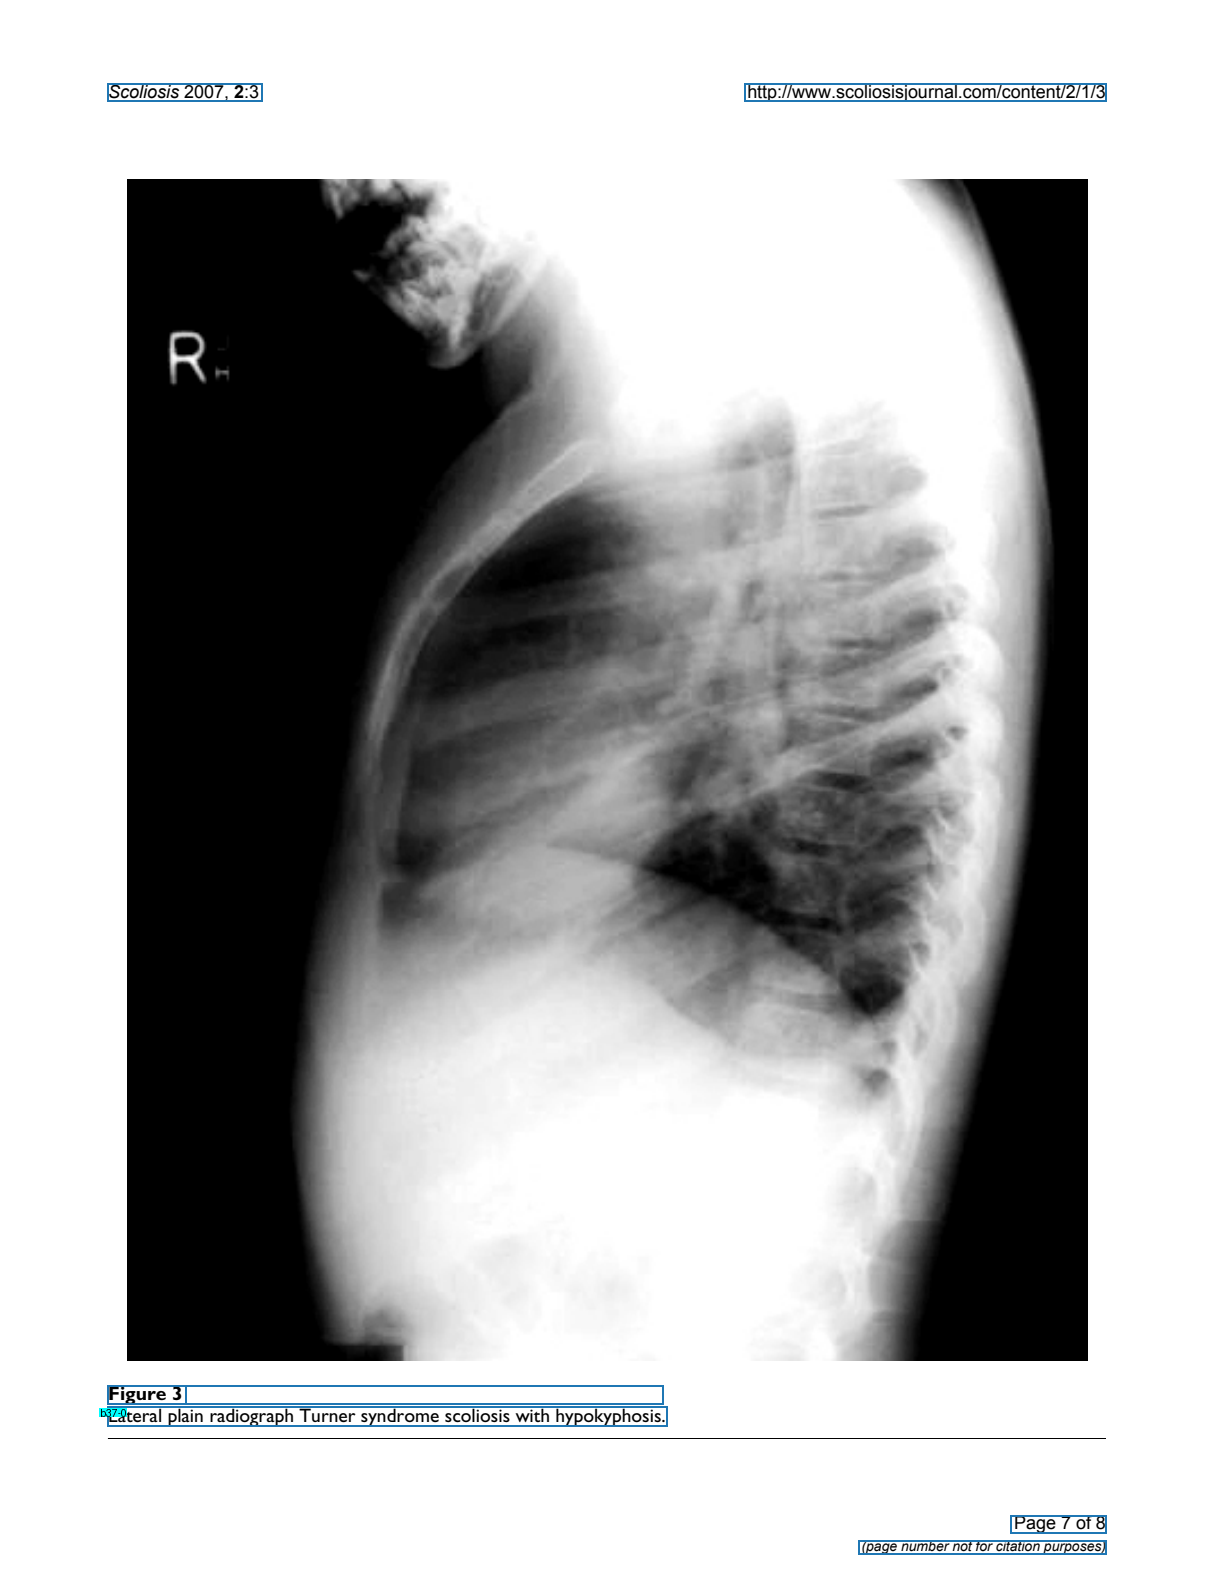

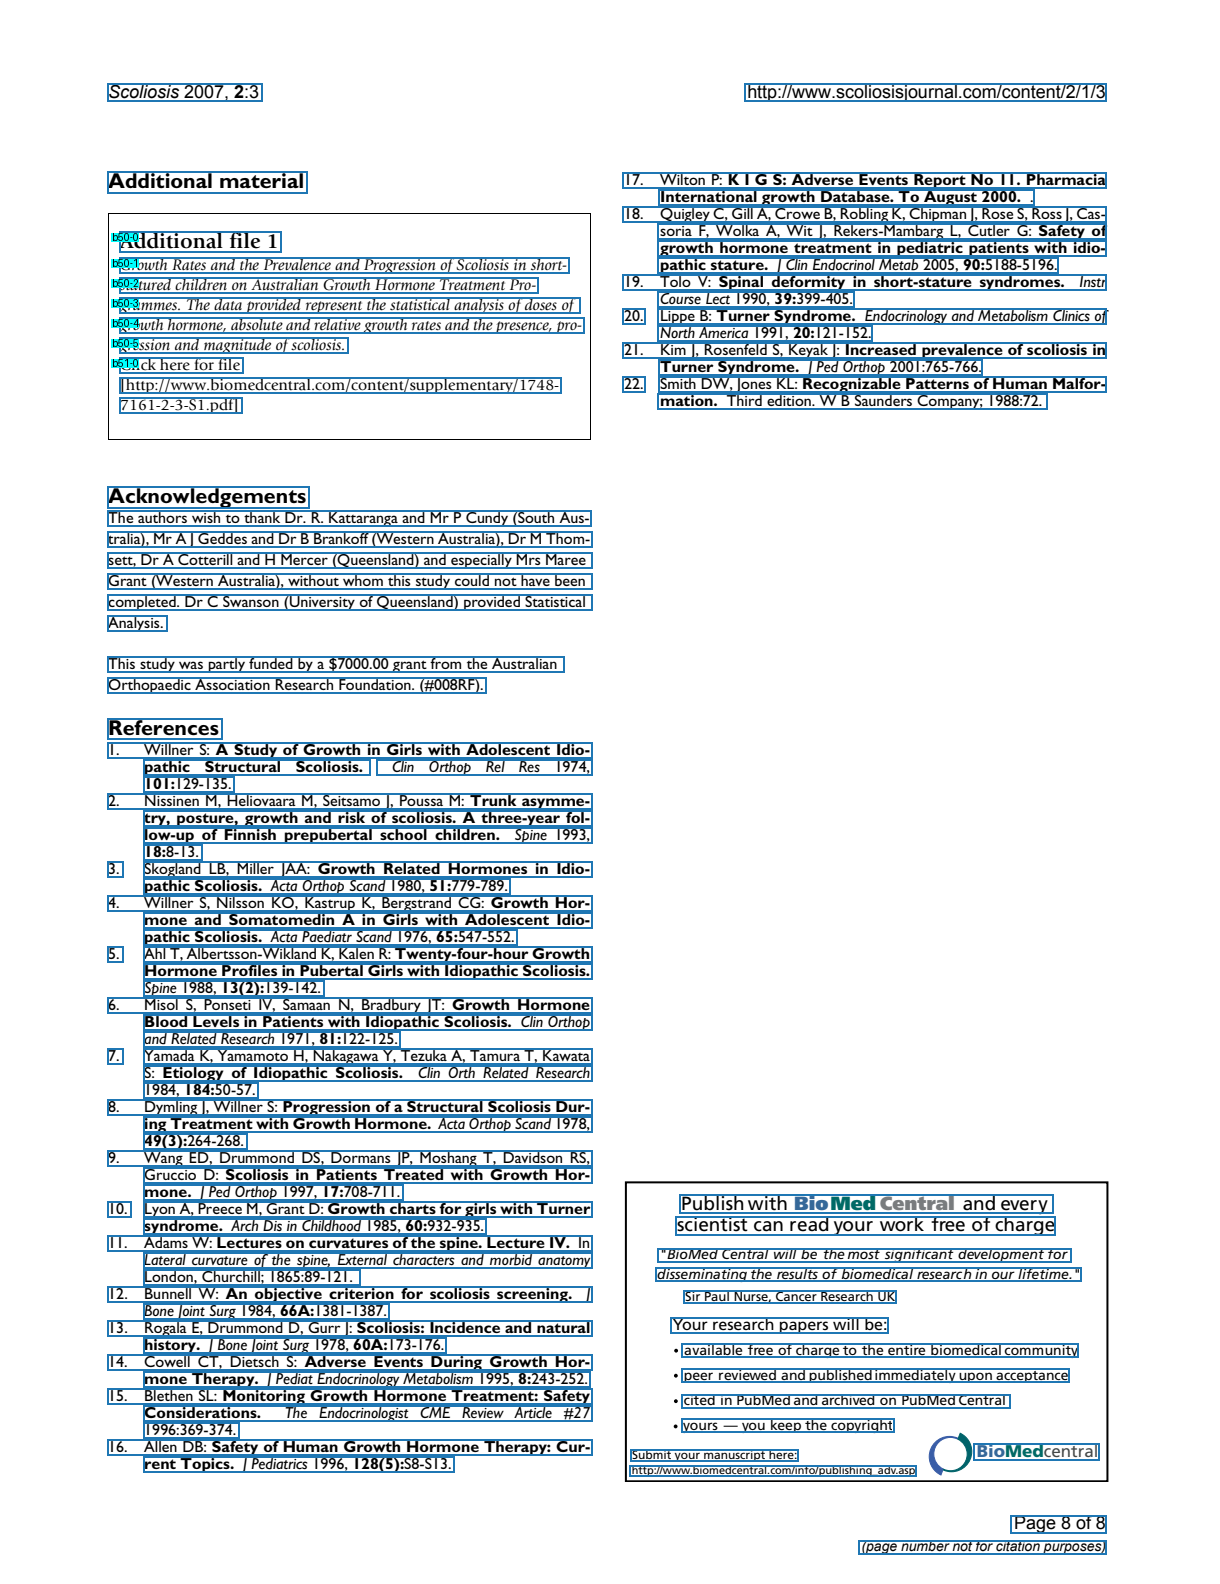

In [19]:
for page in show_annotations(doc.content, doc.content_boxes):
    display(page)